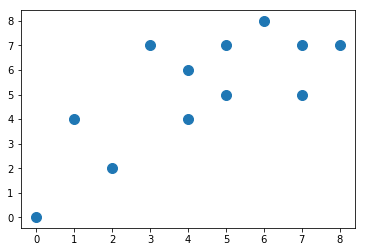

In [6]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [3]:
# k=2

model2 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=100, random_state=1).fit(X)
c0, c1 = model2.cluster_centers_
c0, c1

(array([5.625, 6.5  ]), array([1.75, 2.5 ]))

In [5]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

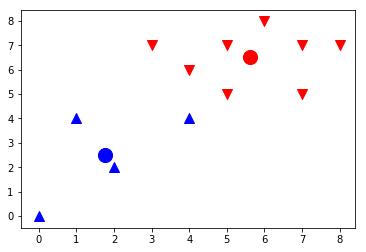

In [7]:
plot_cluster(model2, c0, c1)

In [8]:
# k=3

model3 = KMeans(n_clusters=3, init="random", n_init=1,
               max_iter=100, random_state=1).fit(X)
c30, c31, c32 = model3.cluster_centers_
c30, c31, c32

(array([7.  , 6.75]), array([1., 2.]), array([4.2, 5.8]))

In [9]:
def plot_cluster3(model, c0, c1, c2):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(X[model.labels_ == 2, 0],
                X[model.labels_ == 2, 1], s=100, marker='v', c='g')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.scatter(c2[0], c2[1], s=200, c="g")
    plt.show()

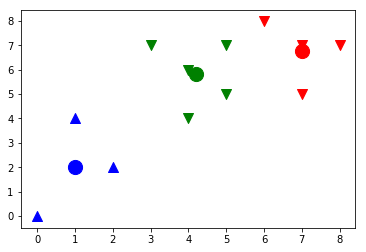

In [10]:
plot_cluster3(model3, c30, c31, c32)

In [11]:
# k=4

model4 = KMeans(n_clusters=4, init="random", n_init=1,
               max_iter=100, random_state=1).fit(X)
c40, c41, c42, c43 = model4.cluster_centers_
c40, c41, c42, c43

(array([7.  , 6.75]),
 array([1., 2.]),
 array([4.        , 6.66666667]),
 array([4.5, 4.5]))

In [12]:
def plot_cluster4(model, c0, c1, c2, c3):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(X[model.labels_ == 2, 0],
                X[model.labels_ == 2, 1], s=100, marker='v', c='g')
    plt.scatter(X[model.labels_ == 3, 0],
                X[model.labels_ == 3, 1], s=100, marker='^', c='y')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.scatter(c2[0], c2[1], s=200, c="g")
    plt.scatter(c3[0], c3[1], s=200, c="y")
    plt.show()

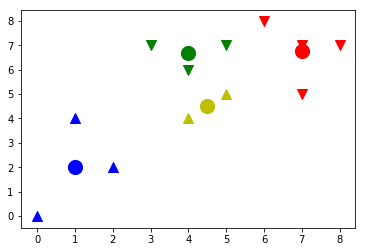

In [13]:
plot_cluster4(model4, c40, c41, c42, c43)

In [14]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
    
inertias

[130.33333333333334,
 45.77777777777777,
 26.35,
 18.85,
 12.916666666666666,
 10.416666666666666,
 6.333333333333333,
 3.5,
 2.5]

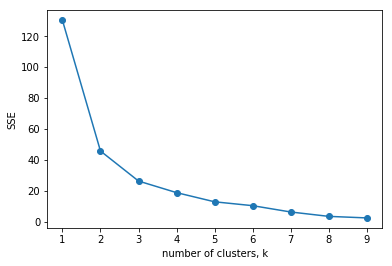

In [15]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [18]:
model2.labels_, model3.labels_, model4.labels_

(array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]),
 array([0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2]),
 array([0, 2, 0, 3, 2, 1, 1, 1, 0, 0, 3, 2]))

In [23]:
def k_cohesion2(model1):
    total_mean=np.mean(X[:,0])
    m1=np.mean(X[model1.labels_==0,0])
    m2=np.mean(X[model1.labels_==1,0])
    count1=np.count_nonzero(model1.labels_== 0)
    count2=np.count_nonzero(model1.labels_== 1)
    separation=count1*(total_mean-m1)**2+count2*(m2-total_mean)**2
    #print(total_mean, m1, m2, count1, count2, separation)
    print(separation)

In [20]:
def k_cohesion3(model1):
    total_mean=np.mean(X[:,0])
    m1=np.mean(X[model1.labels_==0,0])
    m2=np.mean(X[model1.labels_==1,0])
    m3=np.mean(X[model1.labels_==2,0])
    count1=np.count_nonzero(model1.labels_== 0)
    count2=np.count_nonzero(model1.labels_== 1)
    count3=np.count_nonzero(model1.labels_== 2)
    separation=count1*(total_mean-m1)**2+count2*(m2-total_mean)**2+count3*(m3-total_mean)**2
    print(separation)

In [21]:
def k_cohesion4(model1):
    total_mean=np.mean(X[:,0])
    m1=np.mean(X[model1.labels_==0,0])
    m2=np.mean(X[model1.labels_==1,0])
    m3=np.mean(X[model1.labels_==2,0])
    m4=np.mean(X[model1.labels_==3,0])
    count1=np.count_nonzero(model1.labels_== 0)
    count2=np.count_nonzero(model1.labels_== 1)
    count3=np.count_nonzero(model1.labels_== 2)
    count4=np.count_nonzero(model1.labels_== 3)
    separation=count1*(total_mean-m1)**2+count2*(m2-total_mean)**2+count3*(m3-total_mean)**2+count4*(m4-total_mean)**2
    print(separation)

In [31]:
#Cohesions 
k_cohesion2(model2), k_cohesion3(model3), k_cohesion4(model4)

40.04166666666667
61.86666666666667
62.16666666666667


(None, None, None)

In [38]:
#3. 유사성 매트릭스 평가
list1=[]
list1.clear()
len(X)

12

In [39]:
def s_matrix(model1):
    for i in range(0,len(X)):
        list1.append([])
        for j in range(0,len(X)):
            if model1.labels_[i]==model1.labels_[j]:
                list1[i].append(1)
            else :
                list1[i].append(0)

In [40]:
s_matrix(model2)
list1

[[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]]

In [42]:
list1.clear()
s_matrix(model3)
list1

[[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]]

In [43]:
list1.clear()
s_matrix(model4)
list1

[[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]]

In [44]:
def entropy(labels):
    """ Computes entropy of 0-1 vector. """
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels
    n_classes = len(probs)

    if n_classes <= 1:
        return 0
    return - np.sum(probs * np.log(probs)) / np.log(n_classes)

In [45]:
entropy(model2.labels_),entropy(model3.labels_),entropy(model4.labels_)

(0.9182958340544894, 0.9808340377961401, 0.9795739585136223)